In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst[np.where(X_tst.sum(-1) >= 1)] = 0.0
print(X_tst.shape)

cfg = additive_1x2_uniform_triangle_config.cfg
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_triangle_01_generator.Generator
Trainer = trainer.Trainer

In [4]:
net = Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform_triangle/model-400000


2019-01-30 00:54:56,442:INFO:Restoring parameters from experiments/additive_1x2_uniform_triangle/model-400000
2019-01-30 00:55:00,246:INFO:TEST BATCH-0: t = 3.7586, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,254:INFO:TEST BATCH-1: t = 3.7618, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,261:INFO:TEST BATCH-2: t = 3.7648, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,267:INFO:TEST BATCH-3: t = 3.7678, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,274:INFO:TEST BATCH-4: t = 3.7706, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,280:INFO:TEST BATCH-5: t = 3.7733, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,286:INFO:TEST BATCH-6: t = 3.7761, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,293:INFO:TEST BATCH-7: t = 3.7788, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,299:INFO:TEST BATCH-8: t = 3.7814, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,305:INFO:TEST BATCH-9: t

2019-01-30 00:55:00,704:INFO:TEST BATCH-86: t = 4.0321, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,709:INFO:TEST BATCH-87: t = 4.0357, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,714:INFO:TEST BATCH-88: t = 4.0397, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,719:INFO:TEST BATCH-89: t = 4.0432, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,725:INFO:TEST BATCH-90: t = 4.0475, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,731:INFO:TEST BATCH-91: t = 4.0510, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,735:INFO:TEST BATCH-92: t = 4.0544, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,740:INFO:TEST BATCH-93: t = 4.0578, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,746:INFO:TEST BATCH-94: t = 4.0617, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,750:INFO:TEST BATCH-95: t = 4.0653, Net_Loss: -0.243743, Revenue: 0.243743
2019-01-30 00:55:00,757:INFO:TEST BATCH-96: t = 4.

2019-01-30 00:55:01,129:INFO:TEST BATCH-172: t = 4.3185, Net_Loss: -0.079358, Revenue: 0.079358
2019-01-30 00:55:01,133:INFO:TEST BATCH-173: t = 4.3208, Net_Loss: -0.076524, Revenue: 0.076524
2019-01-30 00:55:01,136:INFO:TEST BATCH-174: t = 4.3232, Net_Loss: -0.073690, Revenue: 0.073690
2019-01-30 00:55:01,139:INFO:TEST BATCH-175: t = 4.3259, Net_Loss: -0.070855, Revenue: 0.070855
2019-01-30 00:55:01,143:INFO:TEST BATCH-176: t = 4.3282, Net_Loss: -0.068021, Revenue: 0.068021
2019-01-30 00:55:01,147:INFO:TEST BATCH-177: t = 4.3310, Net_Loss: -0.065187, Revenue: 0.065187
2019-01-30 00:55:01,151:INFO:TEST BATCH-178: t = 4.3339, Net_Loss: -0.062353, Revenue: 0.062353
2019-01-30 00:55:01,154:INFO:TEST BATCH-179: t = 4.3363, Net_Loss: -0.059519, Revenue: 0.059519
2019-01-30 00:55:01,158:INFO:TEST BATCH-180: t = 4.3393, Net_Loss: -0.056684, Revenue: 0.056684
2019-01-30 00:55:01,161:INFO:TEST BATCH-181: t = 4.3420, Net_Loss: -0.053850, Revenue: 0.053850
2019-01-30 00:55:01,164:INFO:TEST BATCH-

In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)

In [6]:
from copy import copy
palette = copy(plt.cm.YlOrRd)
palette.set_over('w')
x = np.linspace(0, 1.0, D)
m = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1).reshape(D,D,2)
mask = m.sum(-1)>1.0

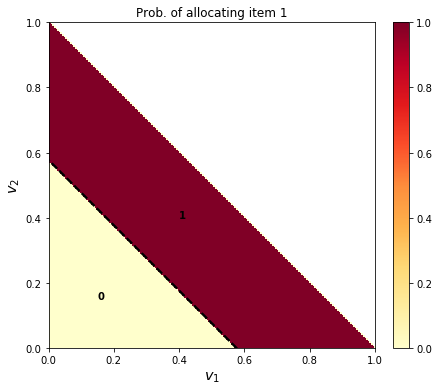

In [7]:
x1 = np.sqrt(1/3)
points = [(x1, 0), (0, x1)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')

plt.axis([0, 1.0, 0, 1.0])
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
a1 = alloc[:, :, 0]
a1[mask] = 10.0
img = ax.imshow(a1[::-1,:], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = palette)

plt.text(0.15, 0.15, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

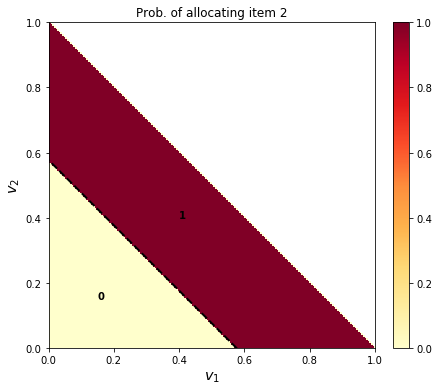

In [8]:
x1 = np.sqrt(1/3)
points = [(x1, 0), (0, x1)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.axis([0, 1.0, 0, 1.0])
plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
a2 = alloc[:, :, 1]
a2[mask] = 10.0
img = ax.imshow(a2[::-1, :], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = palette)


plt.text(0.15, 0.15, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.4, 0.4, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)